In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [33]:
data = pd.read_excel('../dataset/TLKM.xlsx')
data.head()

,"Date,Open,High,Low,Close,Adj Close,Volume"
0,"2017-01-02,3980.000000,3980.000000,3980.000000..."
1,"2017-01-03,3950.000000,3990.000000,3920.000000..."
2,"2017-01-04,3880.000000,3980.000000,3880.000000..."
3,"2017-01-05,3960.000000,4030.000000,3940.000000..."
4,"2017-01-06,3970.000000,4010.000000,3960.000000..."


In [34]:
data[['Date','Open','High','Low','Close','Adj Close','Volume']] = pd.DataFrame(data['Date,Open,High,Low,Close,Adj Close,Volume'].str.split(',').tolist())

In [35]:
data.drop(['Date,Open,High,Low,Close,Adj Close,Volume'], axis=1, inplace=True)

In [36]:
data['Date'] = pd.to_datetime(data['Date'])

In [37]:
data.shape

(1421, 7)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1421 non-null   datetime64[ns]
 1   Open       1421 non-null   object        
 2   High       1421 non-null   object        
 3   Low        1421 non-null   object        
 4   Close      1421 non-null   object        
 5   Adj Close  1421 non-null   object        
 6   Volume     1421 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 77.8+ KB


In [39]:
data[['Open','High','Low','Close','Adj Close','Volume']] = data[['Open','High','Low','Close','Adj Close','Volume']].astype(float)

## EDA

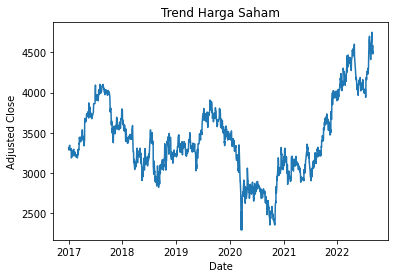

In [40]:
plt.plot(data['Date'], data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Trend Harga Saham')
plt.show()

In [41]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.995589,0.996450,0.991841,0.905116,-0.201404
High,0.995589,1.000000,0.994719,0.996649,0.911251,-0.168296
Low,0.996450,0.994719,1.000000,0.996051,0.905292,-0.226502
Close,0.991841,0.996649,0.996051,1.000000,0.913030,-0.194799
Adj Close,0.905116,0.911251,0.905292,0.913030,1.000000,-0.097010
Volume,-0.201404,-0.168296,-0.226502,-0.194799,-0.097010,1.000000


<AxesSubplot:>

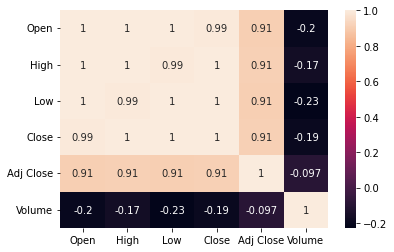

In [42]:
sns.heatmap(data.corr(), annot=True)

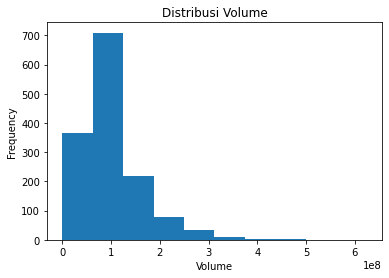

In [43]:
data['Volume'].plot.hist()
plt.xlabel('Volume')
plt.title('Distribusi Volume')
plt.show()

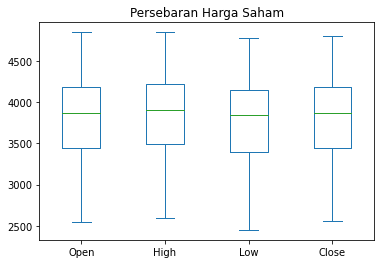

In [44]:
data[['Open', 'High', 'Low', 'Close']].plot.box()
plt.title('Persebaran Harga Saham')
plt.show()

## report

In [45]:
result = adfuller(data['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.271214
p-value: 0.642237
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [46]:
plot_acf(data['Adj Close'])
plt.show()
plot_pacf(data['Adj Close'])
plt.show()

NameError: name 'plot_acf' is not defined

In [ ]:
p = 1
q = 1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Adj Close'], order=(p,0,q))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1421
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7826.815
Date:                Tue, 14 Mar 2023   AIC                          15661.630
Time:                        22:38:38   BIC                          15682.667
Sample:                             0   HQIC                         15669.489
                               - 1421                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3416.3023    248.475     13.749      0.000    2929.301    3903.304
ar.L1          0.9940      0.003    358.616      0.000       0.989       0.999
ma.L1         -0.0581      0.022     -2.648      0.0

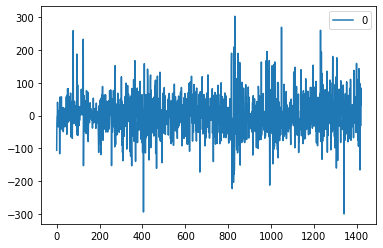

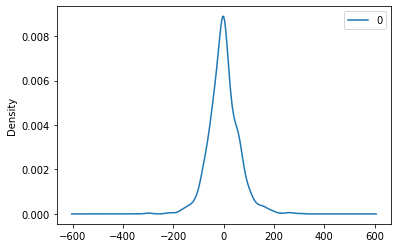

                 0
count  1421.000000
mean      0.867286
std      59.671616
min    -300.712248
25%     -32.626703
50%      -1.020743
75%      31.878090
max     303.824606


In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
forecast = model_fit.forecast(steps=5)
print(forecast)

1421    4571.136181
1422    4564.174191
1423    4557.254172
1424    4550.375871
1425    4543.539036
Name: predicted_mean, dtype: float64


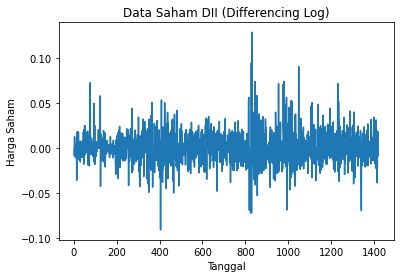

In [ ]:
data['log_adj_close'] = np.log(data['Adj Close'])
data['log_adj_close_diff'] = data['log_adj_close'] - data['log_adj_close'].shift(1)
data.dropna(inplace=True)

# visualisasi data
plt.plot(data['log_adj_close_diff'])
plt.title('Data Saham DII (Differencing Log)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.show()